In [36]:
library(dada2)
library(dplyr)

In [37]:
path = "~/scratch/reads/inverts/mussel.reads/trimmed"

In [38]:
fnFs <- sort(list.files(path, pattern="_R1.fq.gz", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2.fq.gz", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

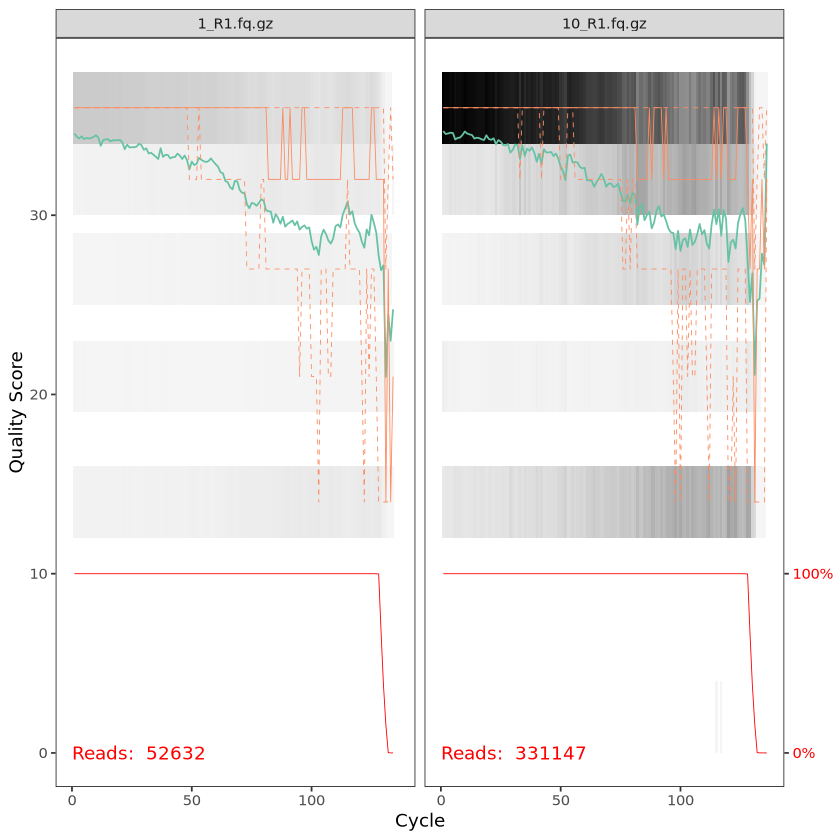

In [39]:
plotQualityProfile(fnFs[1:2])

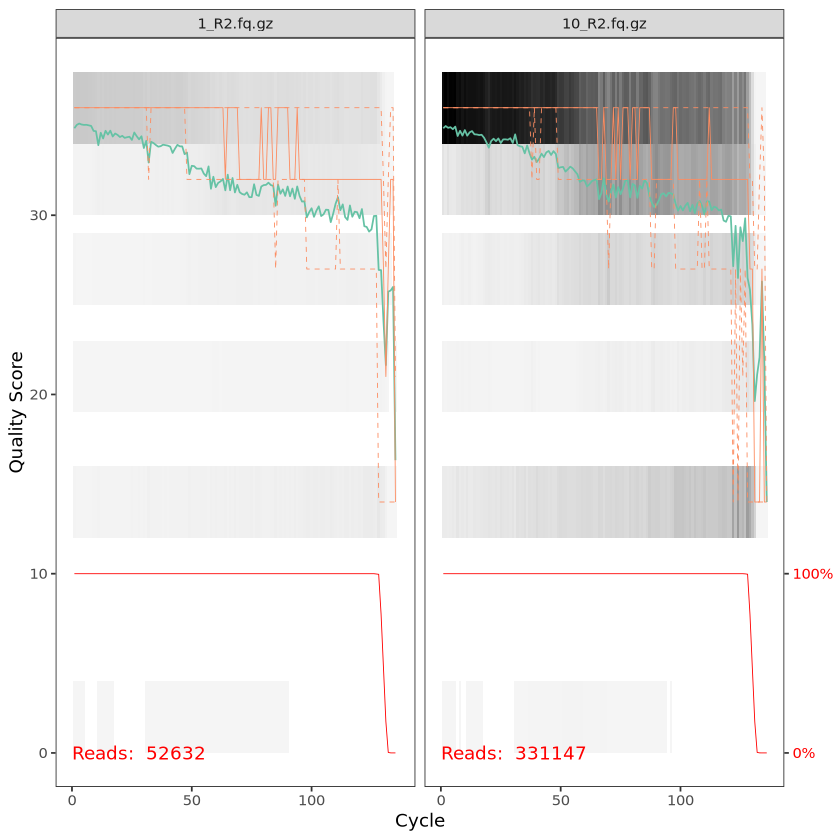

In [40]:
plotQualityProfile(fnRs[1:2])

In [54]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))
names(filtFs) <- sample.names
names(filtRs) <- sample.names

In [55]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, 
                     truncLen=c(125,125),
              maxN=0, maxEE=c(2,2), rm.phix=TRUE,
              compress=TRUE, multithread=8)
head(out)

Creating output directory: /storage/home/nsl5160/scratch/reads/inverts/mussel.reads/trimmed/filtered



,reads.in,reads.out
1_R1.fq.gz,52632,47450
10_R1.fq.gz,331147,296783
100_R1.fq.gz,289159,248887
101_R1.fq.gz,88114,76256
102_R1.fq.gz,65644,56360
103_R1.fq.gz,356608,303910


In [56]:
filtFs <- filtFs[file.exists(filtFs)]
filtRs <- filtRs[file.exists(filtRs)]

In [57]:
errF <- learnErrors(filtFs, multithread=8)
errR <- learnErrors(filtRs, multithread=8)

128705750 total bases in 1029646 reads from 6 samples will be used for learning the error rates.
128705750 total bases in 1029646 reads from 6 samples will be used for learning the error rates.


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


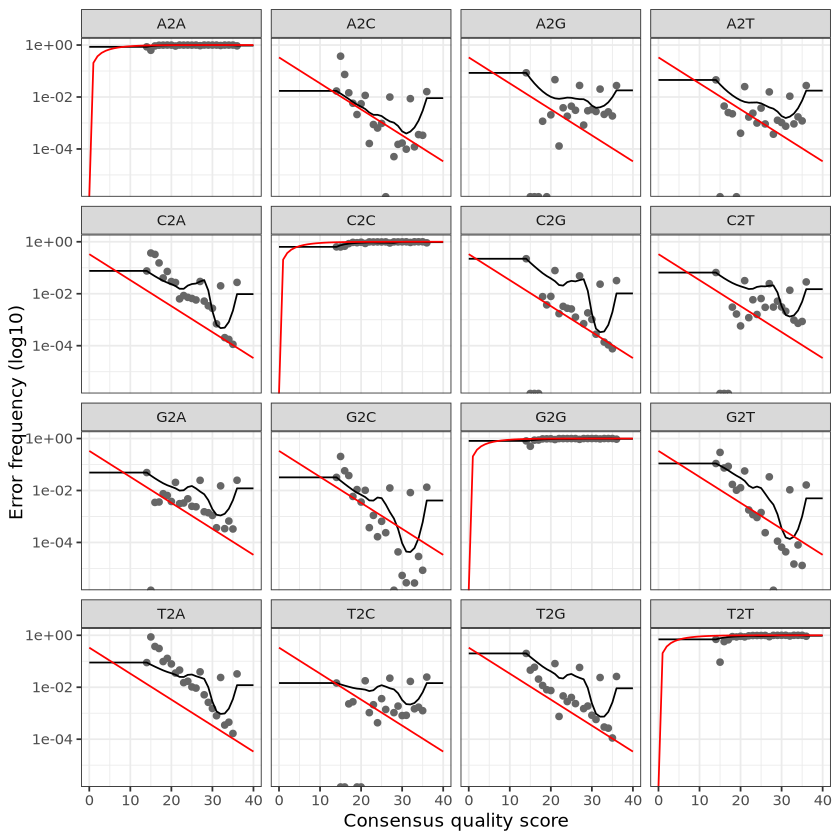

In [58]:
plotErrors(errF, nominalQ=TRUE)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


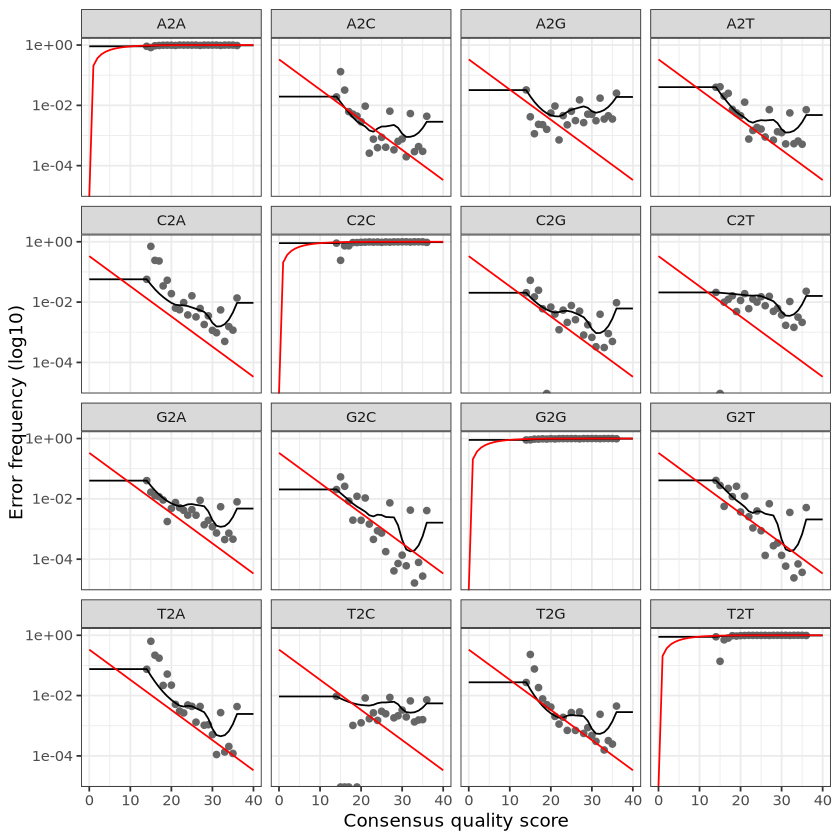

In [59]:
plotErrors(errR, nominalQ=TRUE)

In [60]:
errFbinadj <- learnErrors(filtFs, multithread=8, verbose = TRUE,
                          errorEstimationFunction = loessErrfun_mod4)
errRbinadj <- learnErrors(filtRs, multithread=8, verbose = TRUE,
                          errorEstimationFunction = loessErrfun_mod4)

128705750 total bases in 1029646 reads from 6 samples will be used for learning the error rates.
Initializing error rates to maximum possible estimate.
selfConsist step 1 ......
   selfConsist step 2
   selfConsist step 3
   selfConsist step 4
   selfConsist step 5
   selfConsist step 6
   selfConsist step 7
   selfConsist step 8
   selfConsist step 9
Convergence after  9  rounds.
128705750 total bases in 1029646 reads from 6 samples will be used for learning the error rates.
Initializing error rates to maximum possible estimate.
selfConsist step 1 ......
   selfConsist step 2
   selfConsist step 3
   selfConsist step 4
   selfConsist step 5
   selfConsist step 6
   selfConsist step 7
   selfConsist step 8
Convergence after  8  rounds.


It seems like the adjusted error model (Option 4 in https://github.com/benjjneb/dada2/issues/1307#issuecomment-957680971) that accomodates NextSeq binned Q scores does much better than the default model (e.g. look at the monotonicity) so we'll use this moving forward instead of the default error model. Given that the Q scores look fairly messed up from fastQC, I still suspect that we have an issue with not enough sequence diversity in the run, so my recommendation is a greater PhiX spike in the future.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


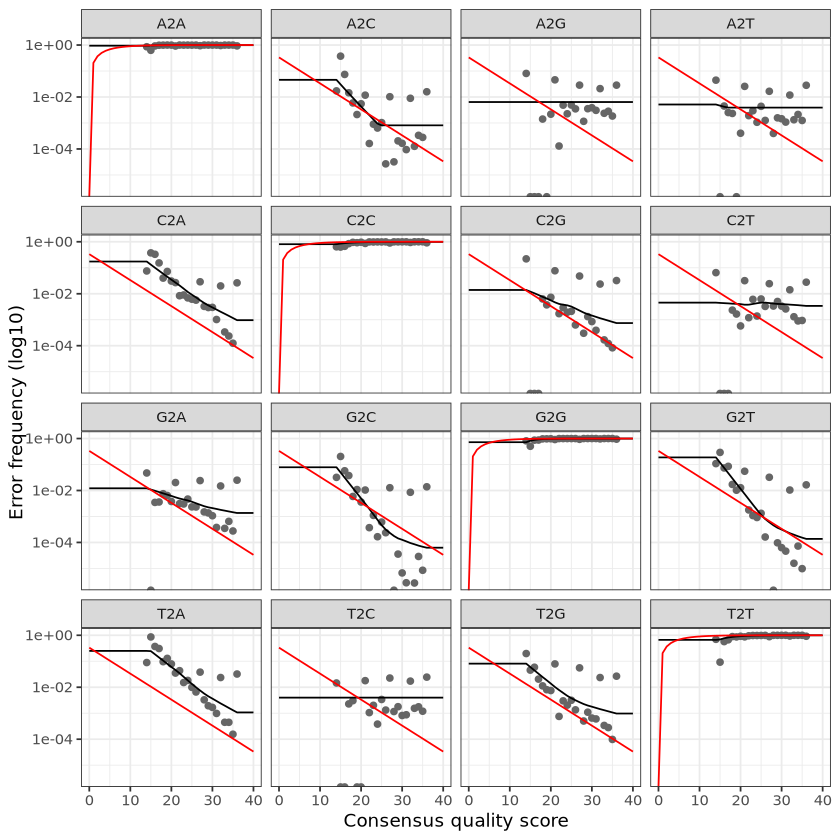

In [61]:
plotErrors(errFbinadj, nominalQ=TRUE)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


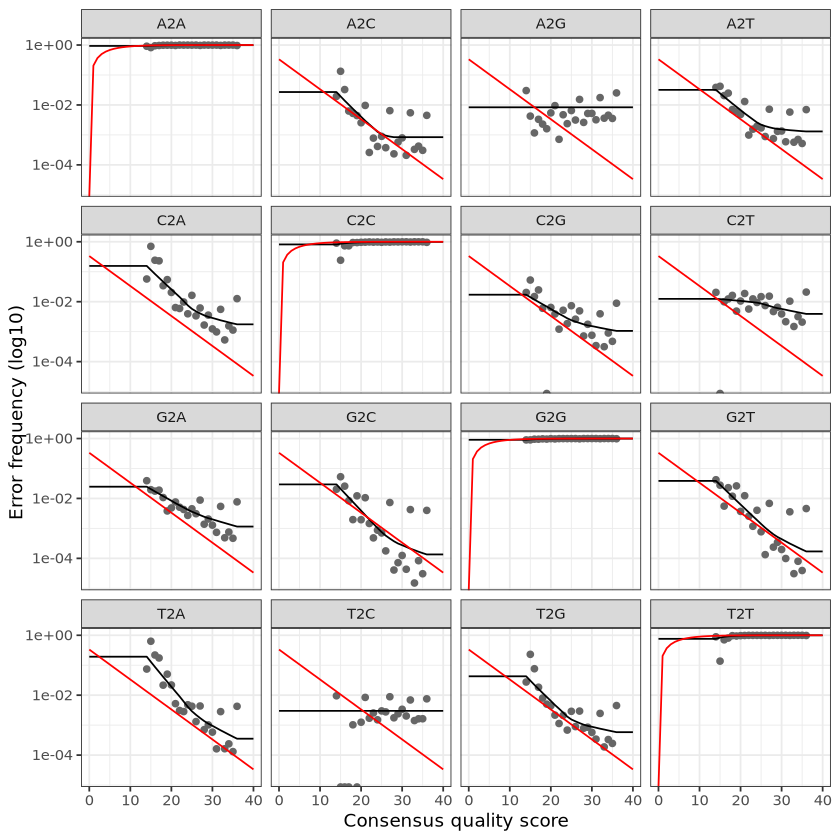

In [62]:
plotErrors(errRbinadj, nominalQ=TRUE)

In [63]:
dadaFs <- dada(filtFs, err=errFbinadj, multithread=8)

Sample 1 - 47450 reads in 21295 unique sequences.
Sample 2 - 296783 reads in 113826 unique sequences.
Sample 3 - 248887 reads in 155067 unique sequences.
Sample 4 - 76256 reads in 47367 unique sequences.
Sample 5 - 56360 reads in 38899 unique sequences.
Sample 6 - 303910 reads in 192496 unique sequences.
Sample 7 - 15529 reads in 15072 unique sequences.
Sample 8 - 494160 reads in 209943 unique sequences.
Sample 9 - 423855 reads in 106330 unique sequences.
Sample 10 - 694541 reads in 258254 unique sequences.
Sample 11 - 121401 reads in 48421 unique sequences.
Sample 12 - 551108 reads in 148718 unique sequences.
Sample 13 - 271070 reads in 126698 unique sequences.
Sample 14 - 573575 reads in 153996 unique sequences.
Sample 15 - 598270 reads in 205718 unique sequences.
Sample 16 - 651619 reads in 186739 unique sequences.
Sample 17 - 718034 reads in 167047 unique sequences.
Sample 18 - 211877 reads in 83385 unique sequences.
Sample 19 - 924286 reads in 243456 unique sequences.
Sample 20 - 

In [64]:
dadaRs <- dada(filtRs, err=errRbinadj, multithread=8)

Sample 1 - 47450 reads in 21855 unique sequences.
Sample 2 - 296783 reads in 117718 unique sequences.
Sample 3 - 248887 reads in 147641 unique sequences.
Sample 4 - 76256 reads in 47059 unique sequences.
Sample 5 - 56360 reads in 36928 unique sequences.
Sample 6 - 303910 reads in 167744 unique sequences.
Sample 7 - 15529 reads in 14696 unique sequences.
Sample 8 - 494160 reads in 196546 unique sequences.
Sample 9 - 423855 reads in 121221 unique sequences.
Sample 10 - 694541 reads in 260017 unique sequences.
Sample 11 - 121401 reads in 43544 unique sequences.
Sample 12 - 551108 reads in 195121 unique sequences.
Sample 13 - 271070 reads in 127854 unique sequences.
Sample 14 - 573575 reads in 199008 unique sequences.
Sample 15 - 598270 reads in 250949 unique sequences.
Sample 16 - 651619 reads in 209886 unique sequences.
Sample 17 - 718034 reads in 216504 unique sequences.
Sample 18 - 211877 reads in 91188 unique sequences.
Sample 19 - 924286 reads in 289725 unique sequences.
Sample 20 - 

In [65]:
mergers <- mergePairs(dadaFs, filtFs, dadaRs, filtRs, verbose=TRUE)
head(mergers[[1]])

33653 paired-reads (in 155 unique pairings) successfully merged out of 39912 (in 263 pairings) input.

219520 paired-reads (in 371 unique pairings) successfully merged out of 283327 (in 694 pairings) input.

158923 paired-reads (in 535 unique pairings) successfully merged out of 219072 (in 834 pairings) input.

29826 paired-reads (in 56 unique pairings) successfully merged out of 74563 (in 125 pairings) input.

24818 paired-reads (in 150 unique pairings) successfully merged out of 32622 (in 270 pairings) input.

235161 paired-reads (in 3960 unique pairings) successfully merged out of 282412 (in 5451 pairings) input.

10 paired-reads (in 1 unique pairings) successfully merged out of 15453 (in 2 pairings) input.

233474 paired-reads (in 1031 unique pairings) successfully merged out of 481872 (in 3063 pairings) input.

126817 paired-reads (in 945 unique pairings) successfully merged out of 420384 (in 1181 pairings) input.

292386 paired-reads (in 1042 unique pairings) successfully merged 

226701 paired-reads (in 483 unique pairings) successfully merged out of 319287 (in 1002 pairings) input.

58140 paired-reads (in 275 unique pairings) successfully merged out of 96917 (in 555 pairings) input.

178374 paired-reads (in 808 unique pairings) successfully merged out of 330867 (in 1557 pairings) input.

176307 paired-reads (in 349 unique pairings) successfully merged out of 314784 (in 808 pairings) input.

169560 paired-reads (in 1081 unique pairings) successfully merged out of 303820 (in 1519 pairings) input.

2 paired-reads (in 1 unique pairings) successfully merged out of 19085 (in 3 pairings) input.

178325 paired-reads (in 1480 unique pairings) successfully merged out of 466566 (in 2066 pairings) input.

351264 paired-reads (in 721 unique pairings) successfully merged out of 647433 (in 1802 pairings) input.

390972 paired-reads (in 967 unique pairings) successfully merged out of 582981 (in 5188 pairings) input.

171655 paired-reads (in 591 unique pairings) successfully m

142447 paired-reads (in 1596 unique pairings) successfully merged out of 231343 (in 1899 pairings) input.

2 paired-reads (in 1 unique pairings) successfully merged out of 25093 (in 3 pairings) input.

377 paired-reads (in 2 unique pairings) successfully merged out of 15739 (in 3 pairings) input.

2 paired-reads (in 1 unique pairings) successfully merged out of 9605 (in 2 pairings) input.

215907 paired-reads (in 1070 unique pairings) successfully merged out of 273702 (in 1654 pairings) input.

0 paired-reads (in 0 unique pairings) successfully merged out of 25713 (in 1 pairings) input.

162123 paired-reads (in 293 unique pairings) successfully merged out of 183974 (in 576 pairings) input.

80197 paired-reads (in 311 unique pairings) successfully merged out of 88998 (in 423 pairings) input.

240482 paired-reads (in 536 unique pairings) successfully merged out of 252468 (in 773 pairings) input.

239231 paired-reads (in 462 unique pairings) successfully merged out of 273932 (in 780 pairi

158391 paired-reads (in 1694 unique pairings) successfully merged out of 199077 (in 1899 pairings) input.

155319 paired-reads (in 997 unique pairings) successfully merged out of 207616 (in 1415 pairings) input.

234799 paired-reads (in 3620 unique pairings) successfully merged out of 314736 (in 4142 pairings) input.

16 paired-reads (in 1 unique pairings) successfully merged out of 16 (in 1 pairings) input.

145411 paired-reads (in 907 unique pairings) successfully merged out of 186268 (in 1223 pairings) input.

132748 paired-reads (in 232 unique pairings) successfully merged out of 164608 (in 416 pairings) input.

171004 paired-reads (in 721 unique pairings) successfully merged out of 203719 (in 1032 pairings) input.

129489 paired-reads (in 476 unique pairings) successfully merged out of 150238 (in 627 pairings) input.

110553 paired-reads (in 359 unique pairings) successfully merged out of 129091 (in 473 pairings) input.

15139 paired-reads (in 137 unique pairings) successfully mer

363638 paired-reads (in 3693 unique pairings) successfully merged out of 668380 (in 5332 pairings) input.

458553 paired-reads (in 2038 unique pairings) successfully merged out of 646292 (in 2936 pairings) input.

273742 paired-reads (in 4816 unique pairings) successfully merged out of 700457 (in 5336 pairings) input.

225142 paired-reads (in 2804 unique pairings) successfully merged out of 350284 (in 3096 pairings) input.

100840 paired-reads (in 479 unique pairings) successfully merged out of 206632 (in 787 pairings) input.

318992 paired-reads (in 2259 unique pairings) successfully merged out of 442772 (in 2975 pairings) input.

335656 paired-reads (in 4713 unique pairings) successfully merged out of 551455 (in 5787 pairings) input.

289 paired-reads (in 1 unique pairings) successfully merged out of 16525 (in 2 pairings) input.

392 paired-reads (in 4 unique pairings) successfully merged out of 81269 (in 40 pairings) input.

230720 paired-reads (in 188 unique pairings) successfully 

,sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
1,GAACACGTCAAGGTACACATCGCTTTGAAAGCTGGTCCGTTGAAACTGTGAACCCACACGAGTGGTGTTATAGGTTCCTCGCATCCGAATCAGAAACAAGTCGCTTTGAAAACGCATTCCGGCAAGACACGAAAAGGCCAACTGAAAACAGGCATTGGAGGCGATCATGCCGATCATCCCCGATCCCATAGTAACGAGACTTGCCGGACCGAGATTTCCG,5983,1,1,30,0,0,2,TRUE
2,CAGGGGCGGGATGGTGGACGTGAGGTTAGGCCCTTGTACGAGGATGAGATCTGGAGGCTACCTGGACTCTCGCCAGAGAGACTGTTGCGTTTGAAGAGGGTCGGTTGGACTGTTGAAGCGTGTACGTAGCAGGCTAGCGGCGAGCGAGCTCCCAAAGCGCATCGCTCAGAGTCGTAAC,3655,2,2,72,0,0,2,TRUE
3,CTCGCCGTGCGACCATTTCCCACATCCCATGGGCGACCCTAGTCGACGTGAGCTCGACCGCTGTATGCAAGTGAGCATCATCGGCATCACGGAGACGCCAGAACCTGATCGCAAAACGATCGGCCGATCCGATAGCAAACAAACACCGTGACTTCTCCCCGAGAGATTCGCTCGTGTGCCACGTGATTTTGGGATCTAGTCTGAGATTTGTGTTTGAACTTTACCAATGGTATC,2565,3,3,16,0,0,2,TRUE
4,CAGTCTGGAGGGCTTGGGATTGGCCGAAAAACGAGGCGAAGGTGGGGGGCGCATTGCTGACAACGGGAAAACCAATCAGGTTCAGGCCTGAGACGGTCCAAGTATGGCGGGGCGGGACGGGCTGGCCTTTGACCTGCCACTTGTAATTGACGTTGGTGGCGCTGGACACATAGACGAGATAGGCGGAATCGCCGACGAGGTTCTG,1888,4,6,45,0,0,1,TRUE
5,CGGAGAGCTTCGCTGGATCGCCGGGGCAGGCACCTTTTTTTACAGCTCGCCCGCGAAAGCCGAAGGGCTCCCGACGATAACGCGTTTTCTGGGGGTCAATTACGACATTACCGAGCGAAAACAGGTGGAGGCGGCGCTGATCACGAGTGACCATCTCGCAA,1624,5,5,89,0,0,1,TRUE
7,CGAGATCTACACTAGATCGCTCGTCGGCAGCGTCAGATGTGTATAAGAGACAGAGGCTTTTGATTCGGGCTGATTGGGGGAAGTGAGACAACAAGGGCAAACGGGAGAAATGGGCGGATTCAGGTGAGAGAGGTGTAGGAACTGGCCTGTCTCTTATACACATCTCCGAGCCCACGAGACTAAGGCGAATCGGGGATG,1260,218,119,52,0,0,2,TRUE


In [66]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

[1]    391 269833

In [67]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", 
                                    multithread=8, verbose=TRUE)
dim(seqtab.nochim)

Identified 201454 bimeras out of 269833 input sequences.



[1]   391 68379

In [68]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.8536342

In [69]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)

,input,filtered,denoisedF,denoisedR,merged,nonchim
1,52632,47450,40198,46387,33653,32911
10,331147,296783,284395,294336,219520,202303
100,289159,248887,220377,245757,158923,143870
101,88114,76256,75072,75493,29826,28454
102,65644,56360,33229,54899,24818,22587
103,356608,303910,283952,299447,235161,201601


In [70]:
save.image(file='../dada2_mussels.RData')

In [71]:
write.csv(track, "../data_mussels_tracking_dada2.csv")

In [72]:
tableexport = t(seqtab.nochim)

In [73]:
tableexport = as.data.frame(tableexport)

In [74]:
tableexport$CountsAcross = rowSums(tableexport)

In [75]:
tableexport <- cbind(ASV = rownames(tableexport), tableexport)
rownames(tableexport) <- 1:nrow(tableexport)

In [76]:
write.csv(tableexport, "../dada2_asv_table_mussels.csv")

In [44]:
loessErrfun_mod4 <- function(trans) {
  qq <- as.numeric(colnames(trans))
  est <- matrix(0, nrow=0, ncol=length(qq))
  for(nti in c("A","C","G","T")) {
    for(ntj in c("A","C","G","T")) {
      if(nti != ntj) {
        errs <- trans[paste0(nti,"2",ntj),]
        tot <- colSums(trans[paste0(nti,"2",c("A","C","G","T")),])
        rlogp <- log10((errs+1)/tot)  # 1 psuedocount for each err, but if tot=0 will give NA
        rlogp[is.infinite(rlogp)] <- NA
        df <- data.frame(q=qq, errs=errs, tot=tot, rlogp=rlogp)
        
        # original
        # ###! mod.lo <- loess(rlogp ~ q, df, weights=errs) ###!
        # mod.lo <- loess(rlogp ~ q, df, weights=tot) ###!
        # #        mod.lo <- loess(rlogp ~ q, df)
        
        # jonalim's solution
        # https://github.com/benjjneb/dada2/issues/938
        mod.lo <- loess(rlogp ~ q, df, weights = log10(tot),degree = 1, span = 0.95)
        
        pred <- predict(mod.lo, qq)
        maxrli <- max(which(!is.na(pred)))
        minrli <- min(which(!is.na(pred)))
        pred[seq_along(pred)>maxrli] <- pred[[maxrli]]
        pred[seq_along(pred)<minrli] <- pred[[minrli]]
        est <- rbind(est, 10^pred)
      } # if(nti != ntj)
    } # for(ntj in c("A","C","G","T"))
  } # for(nti in c("A","C","G","T"))
  
  # HACKY
  MAX_ERROR_RATE <- 0.25
  MIN_ERROR_RATE <- 1e-7
  est[est>MAX_ERROR_RATE] <- MAX_ERROR_RATE
  est[est<MIN_ERROR_RATE] <- MIN_ERROR_RATE
  
  # enforce monotonicity
  # https://github.com/benjjneb/dada2/issues/791
  estorig <- est
  est <- est %>%
    data.frame() %>%
    mutate_all(funs(case_when(. < X40 ~ X40,
                              . >= X40 ~ .))) %>% as.matrix()
  rownames(est) <- rownames(estorig)
  colnames(est) <- colnames(estorig)
  
  # Expand the err matrix with the self-transition probs
  err <- rbind(1-colSums(est[1:3,]), est[1:3,],
               est[4,], 1-colSums(est[4:6,]), est[5:6,],
               est[7:8,], 1-colSums(est[7:9,]), est[9,],
               est[10:12,], 1-colSums(est[10:12,]))
  rownames(err) <- paste0(rep(c("A","C","G","T"), each=4), "2", c("A","C","G","T"))
  colnames(err) <- colnames(trans)
  # Return
  return(err)
}